# Plot examples of downsampled tracks

In [1]:
import utils

## 1. Load data

In [2]:
!gsutil -m cp -n -r gs://capstone_datasets/librispeech/test/predictions/* ./predictions/

Skipping existing item: file://./predictions/lr-clean-test-w2v2-base-960h.hf/dataset.arrow
Skipping existing item: file://./predictions/lr-clean-test-w2v2-base-960h.hf/dataset_info.json
Skipping existing item: file://./predictions/lr-clean-test-w2v2-base-960h.hf/state.json


In [3]:
dataset = utils.load_from_disk(utils.os.path.join(utils.predictions_path, 'lr-clean-test-w2v2-base-960h.hf'))

In [4]:
dataset

Dataset({
    features: ['audio', 'label', 'ground_truth', 'logits', 'transcription'],
    num_rows: 2620
})

In [5]:
dataset.num_rows

2620

## 2. Plot downsampled track

In [40]:
import matplotlib.pyplot as plt

In [39]:
track = dataset.select([0])
track

Dataset({
    features: ['audio', 'label', 'ground_truth', 'logits', 'transcription'],
    num_rows: 1
})

In [41]:
time_range = range(51900,52000)

In [44]:
ds_rates = [16000,8000,4000,2000,1000,500]
subtracks_ds = [track['audio'][0]['array'][time_range]]

In [47]:
for ds_rate in ds_rates[1:]:
    subtracks_ds.append(track.map(utils.map_to_downsampled, fn_kwargs={"input_sr": 16000, "output_sr": ds_rate})['audio'][0]['array'][time_range])

Loading cached processed dataset at /home/antonin/Capstone-Audio-Transcription/wav2vec/predictions/lr-clean-test-w2v2-base-960h.hf/cache-973f1fda20c3e22d.arrow
Loading cached processed dataset at /home/antonin/Capstone-Audio-Transcription/wav2vec/predictions/lr-clean-test-w2v2-base-960h.hf/cache-90035646849080d1.arrow
Loading cached processed dataset at /home/antonin/Capstone-Audio-Transcription/wav2vec/predictions/lr-clean-test-w2v2-base-960h.hf/cache-9c2a8f1706193adb.arrow


  0%|          | 0/1 [00:00<?, ?ex/s]

Loading cached processed dataset at /home/antonin/Capstone-Audio-Transcription/wav2vec/predictions/lr-clean-test-w2v2-base-960h.hf/cache-7f696355b25628a7.arrow


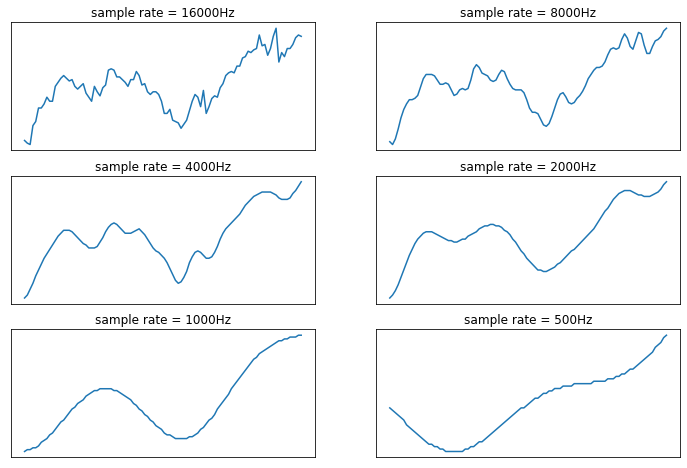

In [66]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))

# disable all axis
for ax in axs.flatten(): 
    ax.set_xticks([])
    ax.set_yticks([])
    
for i, ax in enumerate(axs.flatten()):
    ax.plot(subtracks_ds[i])
    ax.set_title('sample rate = ' + str(ds_rates[i]) + 'Hz')

plt.show()